# Ilots EthnoBotaniques - Ilots de Chaleur Urbains

Analyses des données récoltées a fort de l'île Sainte-Hélène été 2023.

Sensor Elitech RC-5 identified by serial numbers (SN)

- SNxxx51 on stone wall of the fort (data_stone)
- SNxxx78 on the part covered by *Parthenocissus quinquefolia* (data_plant)

In [6]:
import requests
import pandas as pd
from geopy.geocoders import Nominatim
import seaborn as sns
import plotly.express as px

date_stamp  = '20230719'
data_stone = f'data/EFE231100351_{date_stamp}.xlsx'
data_plant = f'data/EFE231100378_{date_stamp}.xlsx'


In [7]:
geolocator = Nominatim(user_agent="hien_foo")
montreal = geolocator.geocode("Montreal, Quebec, Canada")
lat = montreal.latitude
lon = montreal.longitude

print(f"{lat}, {lon}")

45.5031824, -73.5698065


In [24]:
# https://www.thepythoncode.com/article/interactive-weather-plot-with-matplotlib-and-requests

# Get the temperatures of a given location
#
#response = requests.get(f'https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&hourly=temperature_2m')
end_date = '2023-07-19'
response = requests.get(f"https://archive-api.open-meteo.com/v1/era5?latitude={lat}&longitude={lon}&start_date=2023-06-29&end_date={end_date}&hourly=temperature_2m")
temperatures = response.json().get('hourly')['temperature_2m']
datetimes = response.json().get('hourly')['time']
df_meteo_mtl = pd.DataFrame({'Dates': datetimes, 'Temperatures': temperatures})
df_meteo_mtl

,Dates,Temperatures
0,2023-06-29T00:00,20.1
1,2023-06-29T01:00,19.7
2,2023-06-29T02:00,19.3
3,2023-06-29T03:00,19.0
4,2023-06-29T04:00,18.8
...,...,...
283,2023-07-10T19:00,21.5
284,2023-07-10T20:00,21.3
285,2023-07-10T21:00,21.1
286,2023-07-10T22:00,21.0


<Axes: xlabel='Dates'>

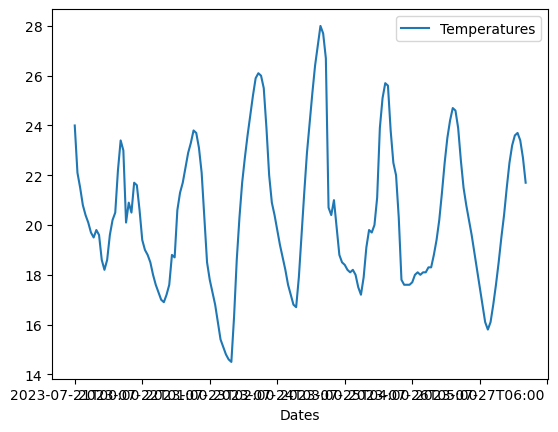

In [23]:
df_meteo_mtl.plot(x='Dates', y='Temperatures')

In [10]:
df78 = pd.read_excel(data_plant, skiprows=28, usecols=[1, 2])
df78.columns = ['Dates', 'Sensor_78']
df78.head()

,Dates,Sensor_78
0,2023-06-28 14:46:48,22.3
1,2023-06-28 15:01:48,21.9
2,2023-06-28 15:16:48,21.3
3,2023-06-28 15:31:48,21.3
4,2023-06-28 15:46:48,20.9


In [12]:
df51 = pd.read_excel(data_stone, skiprows=28, usecols=[1, 2])
df51.columns = ['Dates', 'Sensor_51']
df51.tail()

,Dates,Sensor_51
1997,2023-07-19 10:01:48,28.6
1998,2023-07-19 10:16:48,29.3
1999,2023-07-19 10:31:48,29.9
2000,2023-07-19 10:46:48,30.3
2001,2023-07-19 11:01:48,31.2


In [17]:
df = pd.merge(df51, df78, on='Dates')
df.describe()

,Sensor_51,Sensor_78
count,2002.000000,2002.000000
mean,25.453047,24.280519
std,5.395694,4.201043
min,17.600000,17.600000
25%,21.200000,21.000000
50%,23.800000,23.300000
75%,28.575000,27.000000
max,41.700000,38.800000


<Axes: xlabel='Dates'>

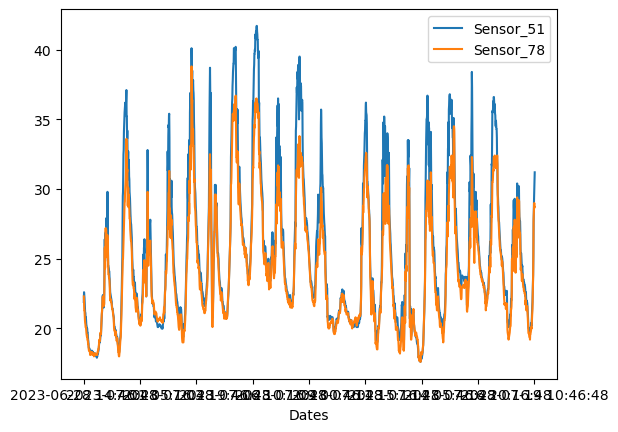

In [18]:
df.plot(x='Dates', y=['Sensor_51', 'Sensor_78'])

In [19]:
fig = px.line(df, x="Dates", y=df.columns,
              title='Temperatures on the wall of the fort')
fig.write_image('temperatures_by_sensors.png')
fig.show()

In [20]:
df1 = pd.concat([df, df_meteo_mtl])
df1

,Dates,Sensor_51,Sensor_78,Temperatures
0,2023-06-28 14:46:48,21.9,22.3,NaN
1,2023-06-28 15:01:48,22.6,21.9,NaN
2,2023-06-28 15:16:48,22.4,21.3,NaN
3,2023-06-28 15:31:48,22.2,21.3,NaN
4,2023-06-28 15:46:48,21.8,20.9,NaN
...,...,...,...,...
283,2023-07-10T19:00,NaN,NaN,21.5
284,2023-07-10T20:00,NaN,NaN,21.3
285,2023-07-10T21:00,NaN,NaN,21.1
286,2023-07-10T22:00,NaN,NaN,21.0


In [21]:
fig1 = px.line(df1, x="Dates", y=df1.columns,
              title='Temperatures on the wall of the fort')
fig1.show()